# Messing with Alibi

## Base model training

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [7]:
digits = load_digits()

In [9]:
X, y = digits["data"], digits["target"]

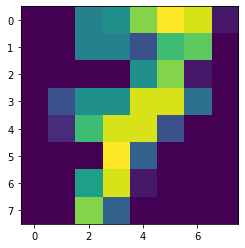

In [12]:
plt.imshow(X[7].reshape(8, 8))
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [26]:
from sklearn.svm import SVC

In [50]:
clf = SVC(probability=True)

In [51]:
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

## Single Example Evaluation

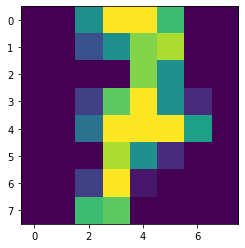

In [52]:
plt.imshow(X_test[1].reshape(8, 8))
plt.show()

In [53]:
y_test[1]

7

In [55]:
clf.predict_proba([X_test[1]])

array([[3.90823738e-04, 1.64873193e-03, 7.99564271e-04, 4.36650871e-03,
        9.65197175e-04, 6.49049180e-04, 4.12572338e-04, 9.88629540e-01,
        1.14444232e-03, 9.93569919e-04]])

## Alibi for Counterfactual Explanation

In [57]:
from alibi.explainers import CounterFactual

In [117]:
cof = CounterFactual(
    lambda x: clf.predict_proba(x),
    (1, 64),
    target_class='other')

In [118]:
exp = cof.explain(X_test[1].reshape(1, -1))

In [119]:
exp

Explanation(meta={
    'name': 'CounterFactual',
    'type': ['blackbox', 'tensorflow', 'keras'],
    'explanations': ['local'],
    'params': {
        'debug': False,
        'write_dir': None,
        'decay': True,
        'init': 'identity',
        'eps': 0.01,
        'learning_rate_init': 0.1,
        'tol': 0.05,
        'max_lam_steps': 10,
        'lam_init': 0.1,
        'early_stop': 50,
        'max_iter': 1000,
        'target_class': 'other',
        'target_proba': 1.0,
        'distance_fn': 'l1',
        'shape': (1, 64),
        'feature_range': (-10000000000.0, 10000000000.0),
        'is_model': False,
        'is_keras': False
    }
}, data={
    'cf': {
        'X': array([[ 0.00000000e+00, -1.19457068e-02,  8.01728153e+00,
         1.59974899e+01,  1.60096016e+01,  1.10070858e+01,
         8.33637454e-03,  1.74390823e-02, -1.88234635e-03,
         5.47889480e-03,  4.02161264e+00,  7.99464655e+00,
         1.29917650e+01,  1.40105095e+01,  8.69788788e-03,
      

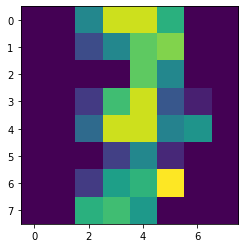

In [120]:
plt.imshow(exp["cf"]["X"].reshape(8, 8))
plt.show()

In [138]:
exp["cf"]["class"]

3

In [139]:
exps = []
for i in exp["all"].keys():
    try:
        exps.append(exp["all"][i][0]["X"])
    except:
        pass

In [140]:
exps = np.array([X_test[1]] + exps)

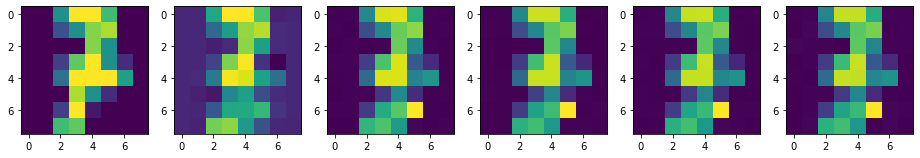

In [141]:
fig, axs = plt.subplots(1, len(exps), figsize=(16, 6))
for ax, im in zip(axs, exps):
    ax.imshow(im.reshape(8, 8))
plt.show()

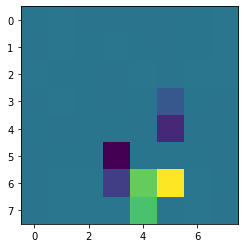

In [143]:
plt.imshow((exps[-1] - exps[0]).reshape(8, 8))
plt.show()